In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [5]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


## dự đoán price dựa vào engine-size

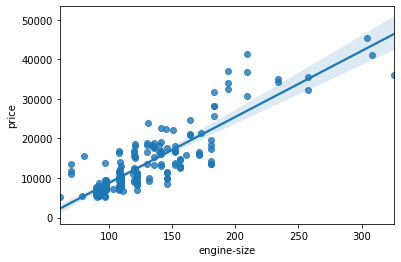

In [6]:
sns.regplot(data=df, x='engine-size', y='price')
plt.show()

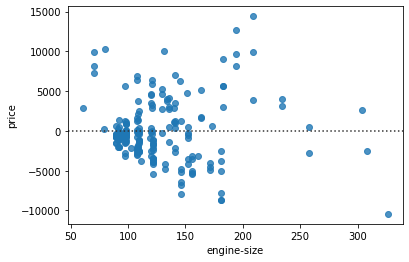

In [7]:
sns.residplot(data=df, x='engine-size', y='price')
plt.show()

In [8]:
## sử dụng simple linear regression để dự đoán price theo engine-size

In [11]:
#import thư viện
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
# chuẩn bị dữ liệu X, y
X = df[['engine-size']]
y = df['price']

In [12]:
# chia dữ liệu thành train và test theo tỉ lệ 80:20
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [13]:
X.shape

(201, 1)

In [14]:
X_train.shape, X_test.shape

((160, 1), (41, 1))

In [15]:
# khởi tạo model
model = LinearRegression()

In [16]:
# huấn luyện model (train model)
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# sử dụng model để dự đoán price dựa vào bộ train
yhat_train = model.predict(X_train)

In [18]:
y_train[:5]

170    10698.0
136     7603.0
140     9233.0
63     18344.0
171     9988.0
Name: price, dtype: float64

In [19]:
yhat_train[:5]

array([10447.36494399, 10107.96104108, 10107.96104108, 14520.21177895,
       12483.78836147])

In [20]:
# kiểm tra trên bộ dữ liệu test
yhat_test = model.predict(X_test)

In [21]:
y_test[:5]

176    15690.0
90      7349.0
54     13645.0
102    19699.0
131    15510.0
Name: price, dtype: float64

In [22]:
yhat_test[:5]

array([20799.18398284,  8241.23957506,  3659.28688573, 22496.2034974 ,
       12314.08641001])

In [25]:
# xác định hệ số a và b 
a = model.intercept_
b = model.coef_[0]

In [26]:
a , b

(-8219.849716224526, 169.70195145649143)

In [27]:
print('Phương trình dự đoán price theo engine-size có dạng:')
print('price=', a, '+', b, 'x engine-size')

Phương trình dự đoán price theo engine-size có dạng:
price= -8219.849716224526 + 169.70195145649143 x engine-size


In [28]:
# đo lường các chỉ số để đánh giá model: R-squared và MSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
# tính R-squared
print('R-squared train data:', round(model.score(X_train, y_train) * 100, 2), '%')
print('R-squared test data:', round(model.score(X_test, y_test) * 100, 2), '%')

R-squared train data: 77.27 %
R-squared test data: 69.93 %


In [31]:
# tính MSE và MAE
print('MSE train data:', mean_squared_error(y_train, yhat_train))
print('MSE test data:', mean_squared_error(y_test, yhat_test))

print('MAE train data:', mean_absolute_error(y_train, yhat_train))
print('MAE test data:', mean_absolute_error(y_test, yhat_test))

MSE train data: 14736830.501063567
MSE test data: 16251666.05978472
MAE train data: 2770.803177049305
MAE test data: 2931.390259039707


In [1]:
'''
với độ chính xác 69.93%, sai số là 2931 ..
'''

'\nvới độ chính xác 69.93%, sai số là 2931 ..\n'

In [32]:
# sử dụng công cụ trực quan để đánh giá model
# vẽ biểu đồ phân tán (scatter) giữa y_test và yhat_test
# vẽ thêm 1 line đóng vai trò tham chiếu đi từ (0, 0) đến (50000, 50000)

In [2]:
plt.figure(figsize = (6,6))
plt.scatter(yhat_test, y_test)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.plot([0, 50000], [0, 50000], 'r-')  # với max của y_test = 45000 => cho 50000 cho nhìn đẹp, rộng
plt.show()

NameError: name 'plt' is not defined